**What's in this notebook?** This notebook validates the non-SUSY AdS KKLT vacua in the leading order EFT described in Appendix C.

(*Created:* Andreas Schachner, June 18, 2024)

# Imports

In [1]:
import os, gzip, pickle, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

sys.path.append("../code/")

from utils import load_zipped_pickle
from validation import verify_complex_structure_stabilisation, verify_SUSY_AdS_minimum, verify_uplifted_minimum

# Load data

We load the data as follows

In [2]:
filename = os.getcwd()+ f"/../data/nonSUSY_AdS_examples/data.p"

df = load_zipped_pickle(filename)

The data is described in more detail in a separate notebook [reading_data.ipynb](./reading_data.ipynb). Here we rather focus on validating the results using the scripts collected in the folder `code`.

As an illustration, we can e.g. display some of the properties here as follows:

In [3]:
display_keys = ['paper name','paper section',"h11","h21","polyID","modelID","gs","W0","gsM","V AdS uplifted"]
df[display_keys]

,paper name,paper section,h11,h21,polyID,modelID,gs,W0,gsM,V AdS uplifted
0,example i,C.3,155,7,35,4,0.146346,0.269965+0.092614j,2.048846,-1.668398e-13
1,example j,C.3,147,7,21,11,0.059205,-0.000793-0.000000j,0.828866,-1.215973e-20
2,example k,C.3,160,6,9,2,0.078693,0.059411-0.000000j,1.101709,-8.776909e-16


As one easily confirms, these are precisely those values as stated in the indicated sections of the paper.

For example, to access the data for a the AdS minimum with ID `j`, we can run

In [4]:
example_j = df[df["paper name"]=="example j"].copy()
example_j[display_keys]

,paper name,paper section,h11,h21,polyID,modelID,gs,W0,gsM,V AdS uplifted
1,example j,C.3,147,7,21,11,0.059205,-0.000793-0.000000j,0.828866,-1.215973e-20


Then, we access the values within the dataframe `example_j` through the keys (just like in a standard python `dict`):

In [5]:
W0 = example_j["W0"].values[0]
gs = example_j["gs"].values[0]
(gs,abs(W0))

(0.05920470889311013, 0.0007934183679530718)

# Verifying complex structure moduli stabilisation

Let us test the stabilisation of the complex structure moduli and the axio-dilaton. To this end, we evaluate the F-term conditions induced by the flux superpotential.

----------------------

Example i

Hodge numbers (h11,h21)= (155, 7)
Conifold curve:  [ 0  0  0  0 -1  0  0]
Conifold curve in basis (should be (1,0,...,0)):  [1 0 0 0 0 0 0]
Check that computed zcf agrees with the saved value:  False

Flux choice...

M-vector:  [ 14 -26 -54  16 -28 -50 -36]
K-vector:  [-5  0  0 -1 -2  2  1]
p-vector:  [0.         0.10714286 0.39285714 0.07142857 0.46428571 0.42857143
 0.14285714]

Tests at the PFV level...

PFV condition 1 satisfied (flat direction: N.p=K (eq. (3.15))):  True
PFV condition 2 satisfied (first quantization condition: b.M is integer (eq. (3.17))):  True
PFV condition 3 satisfied (second quantization condition (eq. (3.16)):  True
PFV condition 4 satisfied (Kahler cone condition (eq. (3.14)):  True

Test the F-term conditions...

F-terms:  [1.27452695e-03 1.58145619e-03 2.04735979e-03 1.07594160e-02
 1.19380873e-03 1.37857855e-03 1.69210464e-04 3.21188884e-11]

Compare computed values with saved values...

Value of the flux superpotential 

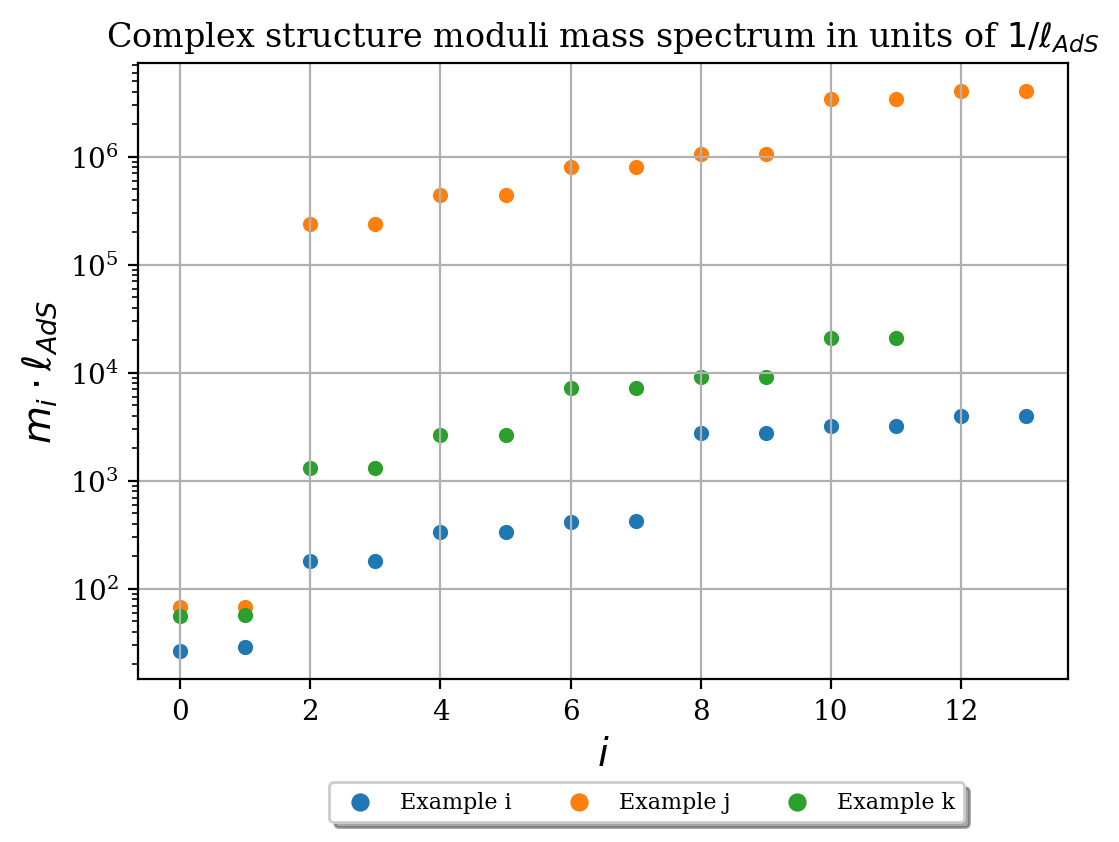

In [6]:
fig = plt.figure(figsize=(6,4),dpi=200)

for i in range(len(df)):
    
    example = df.iloc[i]
    
    h21 = example["h21"]
    
    verify_complex_structure_stabilisation(example)
    
    masses = np.array(example["csm mass spectrum in units of 1/lAdS"])
    
    plt.scatter([i for i in range(2*h21)],masses,s=20,label=str(example["paper name"]).capitalize())
    
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Complex structure moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(0.9, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

# Verifying Kähler moduli stabilisation before uplifting (AdS)

In this section, we check the stabilisation of Kähler moduli in the AdS precursors with worldsheet instanton corrections.

----------------------

Example i

Input values for gs and W0 at the SUSY minimum:
gs = 0.1470263330672283
W0 = 0.28287354265251036

Maximum |dV|:  3.576325172370827e-20
Maximum ratio |dV/V|:  1.5777242834001044e-07

Computed vacuum energy:  -2.2667618227080847e-13
Value expected:  -2.2667618227080872e-13
AdS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  9148.02213870564

Minimal squared mass:  -7.002510537976286

The lowest mass eigenstate is a BF tachyon!

----------------------

----------------------

Example j

Input values for gs and W0 at the SUSY minimum:
gs = 0.05920470889311013
W0 = 0.0007934183679530718

Maximum |dV|:  4.641503420656346e-25
Maximum ratio |dV/V|:  3.58663455881502e-05

Computed vacuum energy:  -1.2941110516120835e-20
Value expected:  -1.2941110516120945e-20
AdS vacuum energy matches 

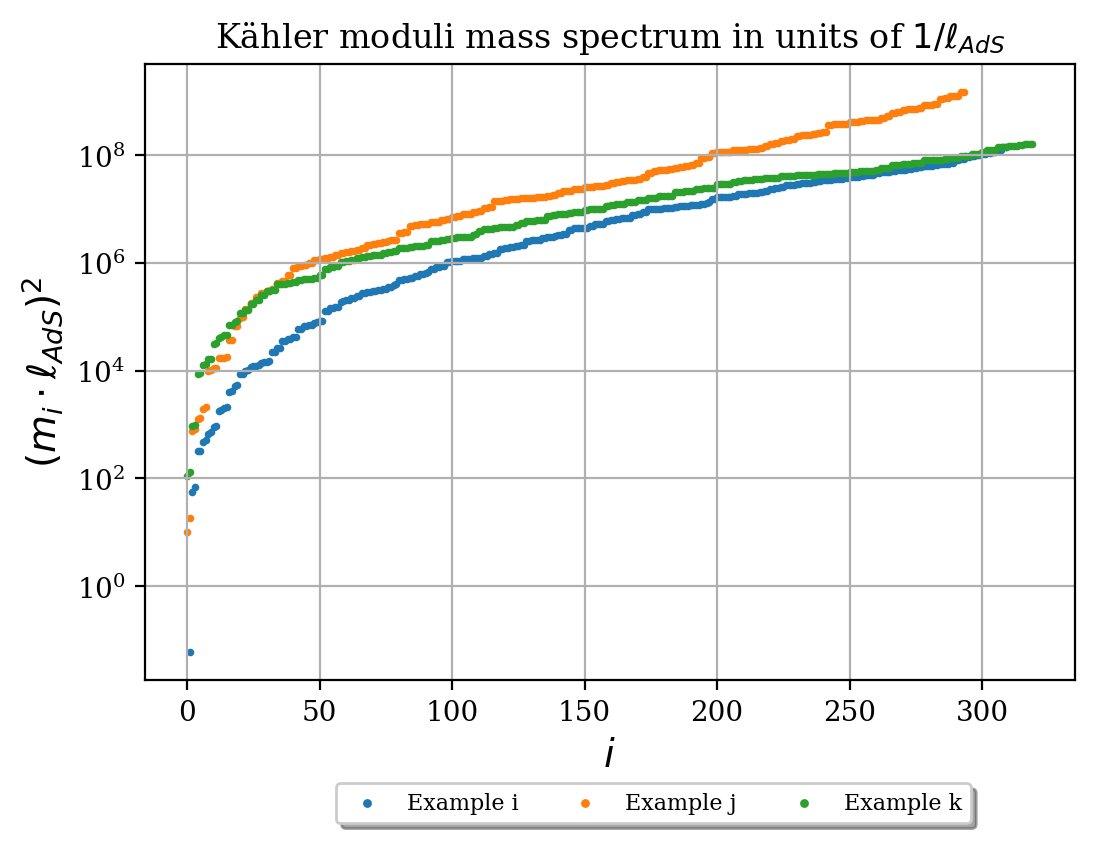

In [7]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df)):
    example = df.iloc[i].copy()
    
    h11 = example["h11"]
    
    verify_SUSY_AdS_minimum(example)
    
    masses = np.array(example["squared km mass spectrum for SUSY AdS"])
    
    print("")
    
    print("Minimal squared mass: ",min(masses))
    
    if min(masses)<0:
        print("")
        print("The lowest mass eigenstate is a BF tachyon!")
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.grid()
plt.ylabel('$(m_i\cdot \ell_{AdS})^2$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(.9, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

# Verifying Kähler moduli stabilisation after uplifting to non-SUSY AdS vacua

Finally, we study the full potential including the uplift contribution from the anti-D3-brane. 

----------------------

Example i

Input values for gs and W0:
gs = 0.1463461492059601
W0 = 0.28540894914069326

Maximum |dV|:  1.4083628777540648e-19
Maximum ratio |dV/V|:  8.441406044297094e-07

Computed vacuum energy:  -1.6683984520630149e-13
Value expected:  -1.6683984520630007e-13
AdS uplifted vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  9213.883196383058

Minimal squared mass:  -8.507307195342271

The lowest mass eigenstate is a BF tachyon!
----------------------

Example j

Input values for gs and W0:
gs = 0.05920470889311013
W0 = 0.0007934183679530718

Maximum |dV|:  7.843129473634171e-27
Maximum ratio |dV/V|:  6.450087054306405e-07

Computed vacuum energy:  -1.2159726539501043e-20
Value expected:  -1.2159726539501056e-20
AdS uplifted vacuum energy matches expected value:  True

Comparing volumes at t

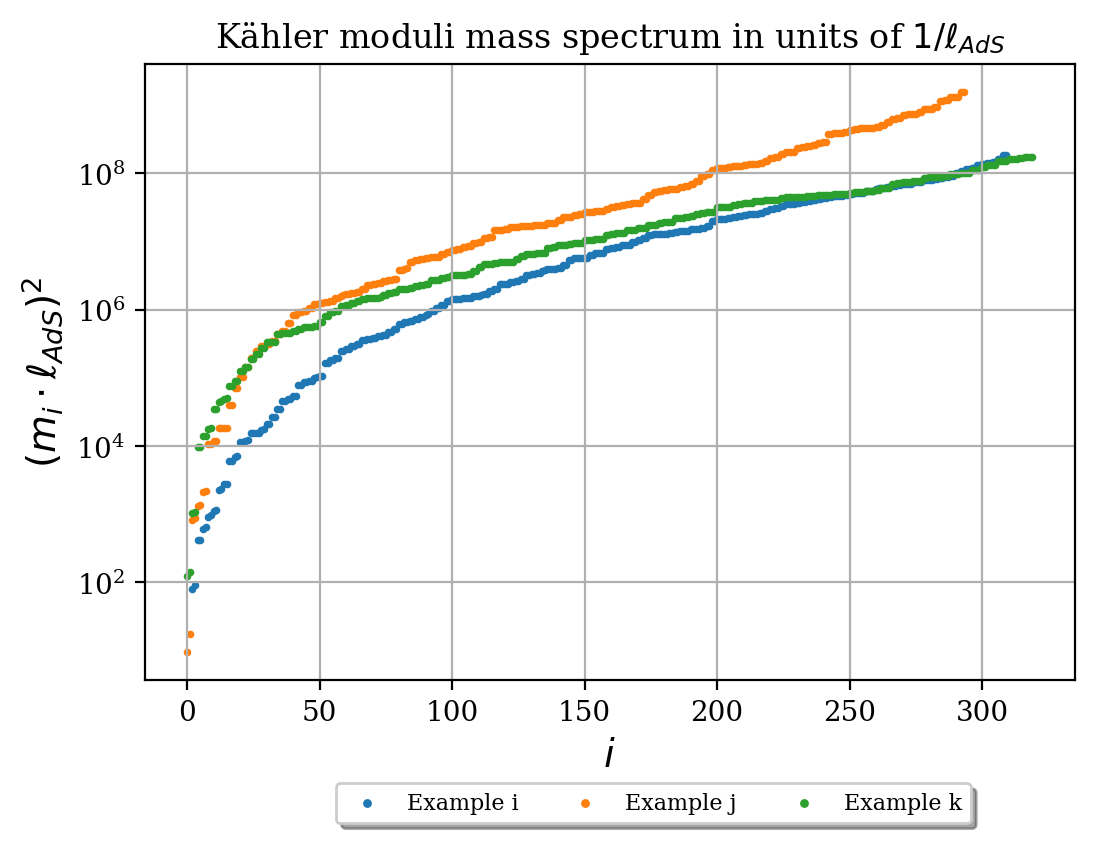

In [8]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df)):
    example = df.iloc[i].copy()
    
   
    verify_uplifted_minimum(example,vacuum_type="AdS uplifted")
    
    h11 = example["h11"]
    
    masses = np.array(example["squared km mass spectrum for non-SUSY AdS"])
    
    print("")
    
    print("Minimal squared mass: ",min(masses))
    
    if min(masses)<0:
        print("")
        print("The lowest mass eigenstate is a BF tachyon!")
    
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    
plt.ylabel('$(m_i\cdot \ell_{AdS})^2$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.grid()
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(0.9, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()